<a href="https://colab.research.google.com/github/ParhamPishro/Solutions-of-FUM-Academic-Exercises/blob/main/Machine%20Learning/4_Dimension_Reduction_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#سوال اول

Matrix A:
[[2 3]
 [3 2]]

Matrix U:
[[-0.70710678 -0.70710678]
 [-0.70710678  0.70710678]]

Matrix D (Diagonal Singular Values):
[[5. 0.]
 [0. 1.]]

Matrix V^T:
[[-0.70710678 -0.70710678]
 [ 0.70710678 -0.70710678]]


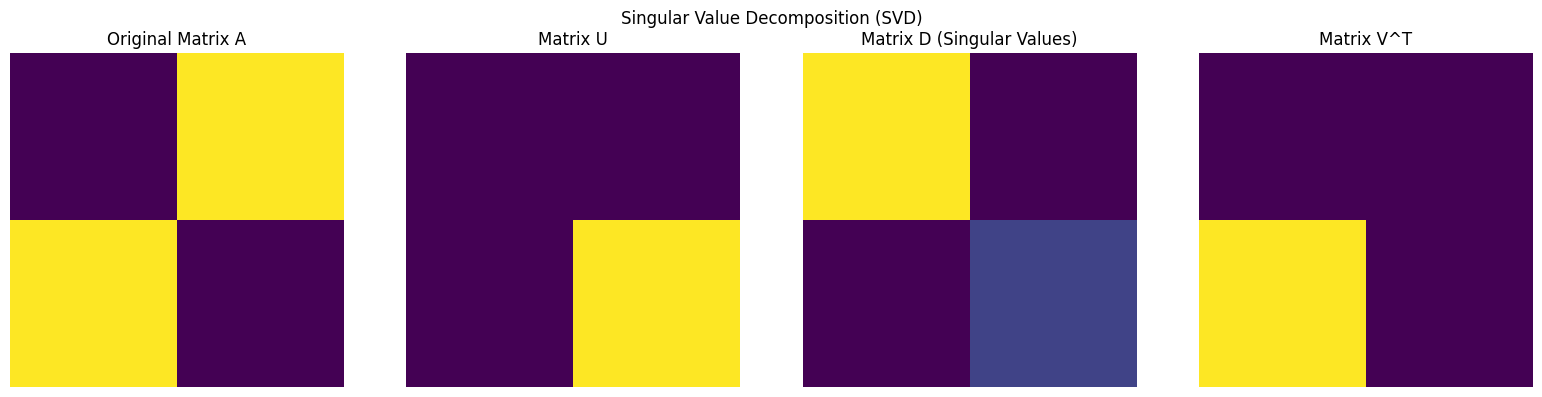

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# تعریف ماتریس A
A = np.array([[2, 3],
              [3, 2]])

# محاسبه SVD
U, D, Vt = np.linalg.svd(A)

# بازسازی ماتریس D به صورت قطری
D_matrix = np.zeros_like(A, dtype=float)  # ساخت ماتریس 2x2 صفر
np.fill_diagonal(D_matrix, D)  # قرار دادن مقادیر منفرد روی قطر اصلی

# نمایش مقادیر
print("Matrix A:")
print(A)

print("\nMatrix U:")
print(U)

print("\nMatrix D (Diagonal Singular Values):")
print(D_matrix)

print("\nMatrix V^T:")
print(Vt)

# رسم نمودارها
fig, axes = plt.subplots(1, 4, figsize=(16, 4))

# 1. رسم ماتریس A
axes[0].imshow(A, cmap='viridis')
axes[0].set_title("Original Matrix A")
axes[0].axis("off")

# 2. رسم ماتریس U
axes[1].imshow(U, cmap='viridis')
axes[1].set_title("Matrix U")
axes[1].axis("off")

# 3. رسم ماتریس D (مقادیر منفرد)
axes[2].imshow(D_matrix, cmap='viridis')
axes[2].set_title("Matrix D (Singular Values)")
axes[2].axis("off")

# 4. رسم ماتریس V^T
axes[3].imshow(Vt, cmap='viridis')
axes[3].set_title("Matrix V^T")
axes[3].axis("off")

# نمایش نمودار
plt.suptitle("Singular Value Decomposition (SVD)")
plt.tight_layout()
plt.show()


In [ ]:
# سوال دوم

In [ ]:
from sklearn.datasets import load_digits    #فراخوانی داده های ارقام دست نویس
import matplotlib.pyplot as plt      #رسم نمودار
import numpy as np
from matplotlib import offsetbox
from sklearn.preprocessing import MinMaxScaler
from sklearn.manifold import Isomap,LocallyLinearEmbedding

In [ ]:
#فراخوانی مجموعه داده

digits = load_digits()
X, y = digits.data, digits.target #داده ها و برچسب ها
n_samples, n_features = X.shape
n_neighbors = 30

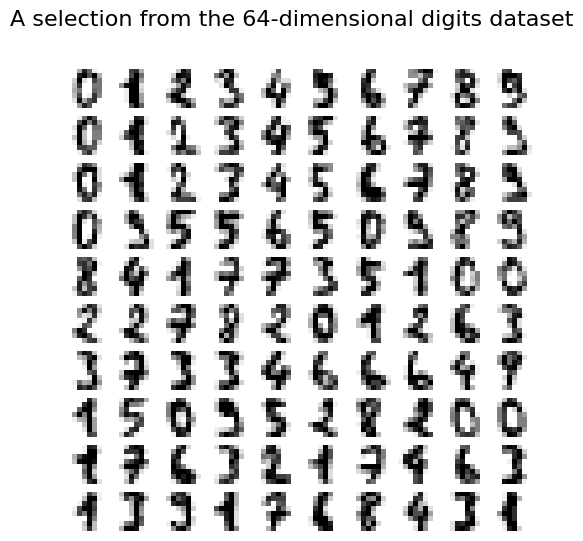

In [ ]:
# رسم داده ها

fig, axs = plt.subplots(nrows=10, ncols=10, figsize=(6, 6))
for idx, ax in enumerate(axs.ravel()):
    ax.imshow(X[idx].reshape((8, 8)), cmap=plt.cm.binary)
    ax.axis("off")
_ = fig.suptitle("A selection from the 64-dimensional digits dataset", fontsize=16)

In [ ]:
import numpy as np     # برای محاسبات عددی (فاصله بین نقاط)
from matplotlib import offsetbox    #برای اضافه کردن تصاویر در موقعیت های مشخص روی نمودار

from sklearn.preprocessing import MinMaxScaler     # برای مقیاس بندی داده ها در بازه{0و1}جهت نمایش بهتر


def plot_embedding(X, title):
    _, ax = plt.subplots()
    X = MinMaxScaler().fit_transform(X) #مقیاس بندی داده ها برای اینکه داده ها در محدوده مناسبی برای رسم قرار گیرند
#رسم نقاط با برچسب هر عدد
    for digit in digits.target_names:
        ax.scatter(
            *X[y == digit].T,
            marker=f"${digit}$",
            s=60,
            color=plt.cm.Dark2(digit),
            alpha=0.425,
            zorder=2,
        )
    shown_images = np.array([[1.0, 1.0]])  # just something big        #اضافه کردن تصاویر کوچک (Annotation Boxes)
    for i in range(X.shape[0]):
        # plot every digit on the embedding
        # show an annotation box for a group of digits
        dist = np.sum((X[i] - shown_images) ** 2, 1)
        if np.min(dist) < 4e-3:
            # don't show points that are too close
            continue
        shown_images = np.concatenate([shown_images, [X[i]]], axis=0)
        imagebox = offsetbox.AnnotationBbox(
            offsetbox.OffsetImage(digits.images[i], cmap=plt.cm.gray_r), X[i]
        )
        imagebox.set(zorder=1)
        ax.add_artist(imagebox)

    ax.set_title(title) # عنوان نمودار
    ax.axis("off")  #محوکردن اسم محورهای افقی و عمودی برای خلوت کردن نمودار

In [ ]:
# Dimensionality reduction to 2D using Locally linear Embedding and Isomap

In [ ]:


embeddings = {

    "Isomap embedding": Isomap(n_neighbors=n_neighbors, n_components=2),
    "Standard LLE embedding": LocallyLinearEmbedding(
        n_neighbors=n_neighbors, n_components=2, method="standard"
    ),
    "Modified LLE embedding": LocallyLinearEmbedding(
        n_neighbors=n_neighbors, n_components=2, method="modified"
    ),
    "Hessian LLE embedding": LocallyLinearEmbedding(
        n_neighbors=n_neighbors, n_components=2, method="hessian"
    ),
    "LTSA LLE embedding": LocallyLinearEmbedding(
        n_neighbors=n_neighbors, n_components=2, method="ltsa"
    ),

}

In [ ]:
from time import time

projections, timing = {}, {}
for name, transformer in embeddings.items():
    if name.startswith("Linear Discriminant Analysis"): # بررسی شرط LDA
        data = X.copy()
        data.flat[:: X.shape[1] + 1] += 0.01  # Make X invertible
    else:   # اگر الگوریتم LDA نباشد
        data = X

    print(f"Computing {name}...")
    start_time = time()
    projections[name] = transformer.fit_transform(data, y)
    timing[name] = time() - start_time

Computing Isomap embedding...
Computing Standard LLE embedding...
Computing Modified LLE embedding...
Computing Hessian LLE embedding...
Computing LTSA LLE embedding...


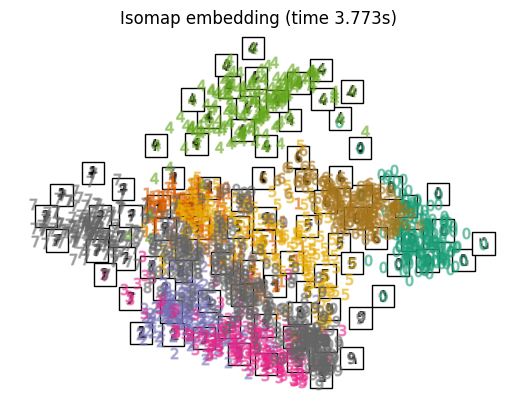

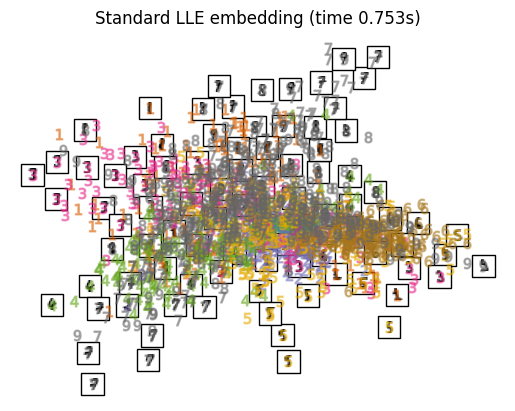

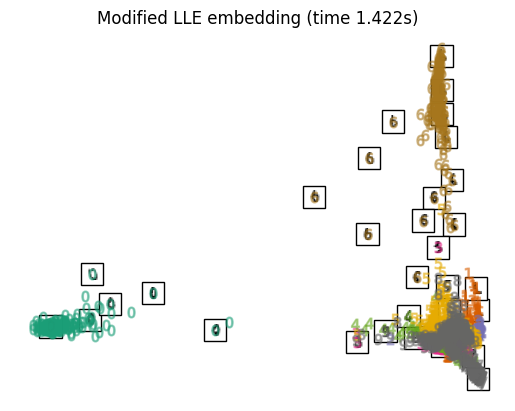

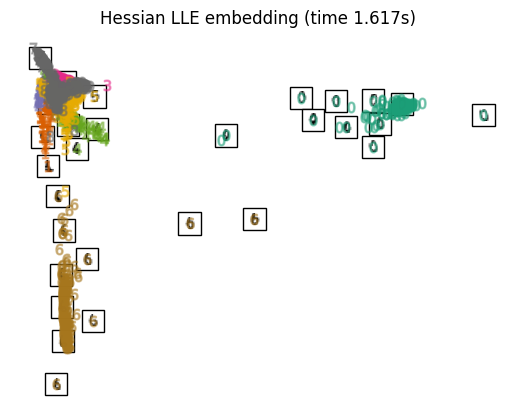

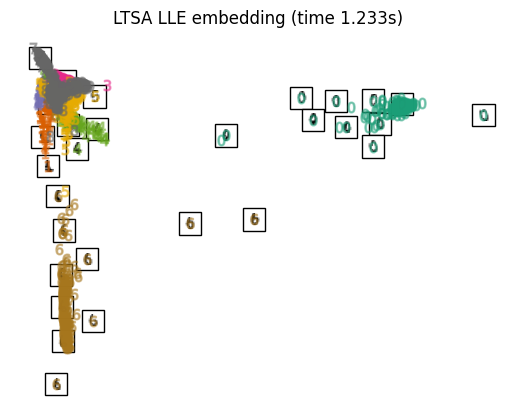

In [ ]:
for name in timing:
    title = f"{name} (time {timing[name]:.3f}s)"
    plot_embedding(projections[name], title)

plt.show()

In [ ]:
# Dimensionality reduction to 2D using Locally linear Embedding and Isomap

In [ ]:
lle=LocallyLinearEmbedding(n_components=2,n_neighbors=n_neighbors,method='standard')
print("Running LLE...")
X_lle = lle.fit_transform(X)



isomap=Isomap(n_components=2,n_neighbors=n_neighbors)
print("Running Isomap...")
X_isomap=isomap.fit_transform(X)




Running LLE...
Running Isomap...


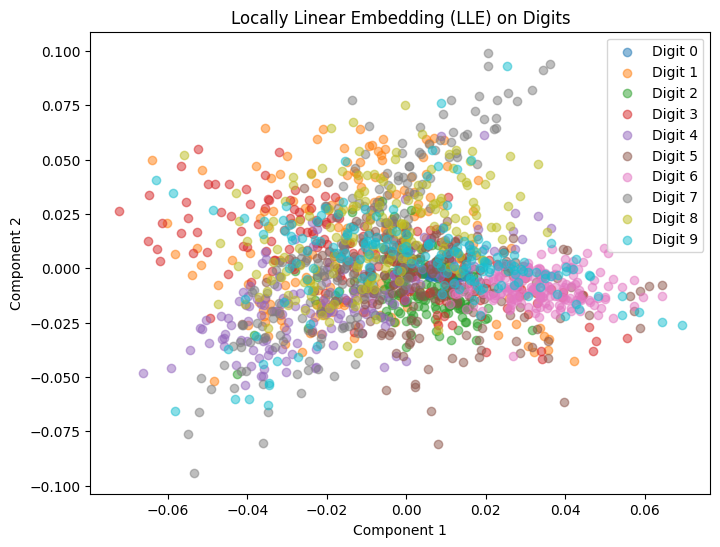

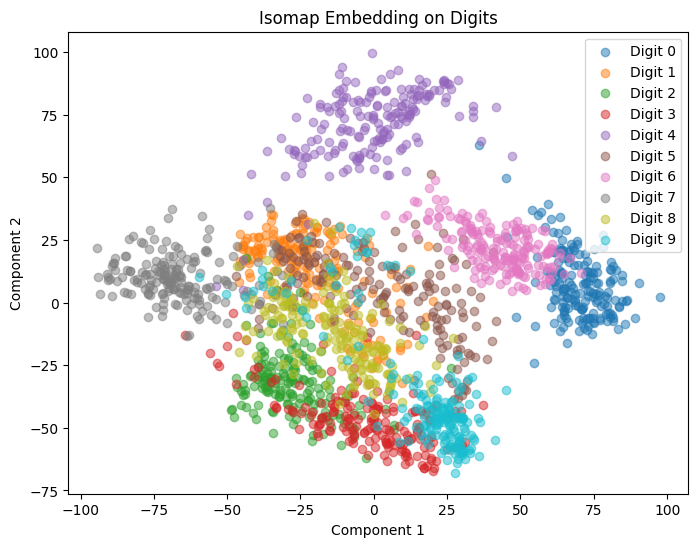

In [ ]:
#رسم نتایج

#تابع کمکی برای رسم نمودار

def plot_embedding(X, y, title):
    plt.figure(figsize=(8, 6))
    for i in range(10):  # برای هر کلاس (۰ تا ۹)
        plt.scatter(X[y == i, 0], X[y == i, 1], label=f"Digit {i}", alpha=0.5)
    plt.legend()
    plt.title(title)
    plt.xlabel("Component 1")
    plt.ylabel("Component 2")
    plt.show()

# رسم نتایجLLE
plot_embedding(X_lle, y, "Locally Linear Embedding (LLE) on Digits")

#رسم نتایج Isomap
plot_embedding(X_isomap, y, "Isomap Embedding on Digits")







